## Zillow Sales versus List prices weekly for major US cities

In [1]:
# Loading in the basics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

In [2]:
# setting up dfs
list_df =  pd.read_csv("resources/final_list_price_data.csv")
sale_df = pd.read_csv("resources/final_sale_price_data.csv")
# inspect list df
list_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,date,price
0,102001,0,United States,Country,NaN,2017-11-04,275448.0
1,394913,1,"New York, NY",Msa,NY,2017-11-04,526850.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,2017-11-04,812252.0
3,394463,3,"Chicago, IL",Msa,IL,2017-11-04,319556.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,2017-11-04,347537.0


In [3]:
# inspect sale df
sale_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,date,price
0,102001,0,United States,Country,NaN,2008-02-23,191138.0
1,394913,1,"New York, NY",Msa,NY,2008-02-23,NaN
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,2008-02-23,516750.0
3,394463,3,"Chicago, IL",Msa,IL,2008-02-23,247988.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,2008-02-23,143466.0


In [5]:
# general cleaning
sale_df = sale_df.drop(["RegionID","RegionType"],1)
list_df = list_df.drop(["RegionID", "RegionType"],1)
list_df.head()


,SizeRank,RegionName,StateName,date,price
0,0,United States,NaN,2017-11-04,275448.0
1,1,"New York, NY",NY,2017-11-04,526850.0
2,2,"Los Angeles-Long Beach-Anaheim, CA",CA,2017-11-04,812252.0
3,3,"Chicago, IL",IL,2017-11-04,319556.0
4,4,"Dallas-Fort Worth, TX",TX,2017-11-04,347537.0


In [8]:
# us data pullout for list and sales data

us_list = list_df.loc[list_df["RegionName"] == "United States"]
us_list = us_list.drop(["SizeRank", "StateName"], 1)
us_sale = sale_df.loc[sale_df["RegionName"] == "United States"]
us_sale = us_sale.drop(["SizeRank", "StateName"],1)

us_sale.head()

,RegionName,date,price
0,United States,2008-02-23,191138.0
97,United States,2008-03-01,192225.0
194,United States,2008-03-08,192225.0
291,United States,2008-03-15,192475.0
388,United States,2008-03-22,194750.0


In [35]:
# prepping us dfs for merge and merging
us_list = us_list.rename(columns = {"price":"list price"})
us_sale = us_sale.rename(columns = {"price":"sale price"})

us_df = us_list.merge(us_sale, on = ["RegionName","date"], how = "right")
us_df = us_df.dropna()

us_df["date"] = pd.to_datetime(us_df["date"])

us_df.head()


,RegionName,date,list price,sale price
506,United States,2017-11-04,275448.0,235099.0
507,United States,2017-11-11,275448.0,234750.0
508,United States,2017-11-18,275448.0,235750.0
509,United States,2017-11-25,274975.0,235916.0
510,United States,2017-12-02,274825.0,237166.0


<AxesSubplot:xlabel='date'>

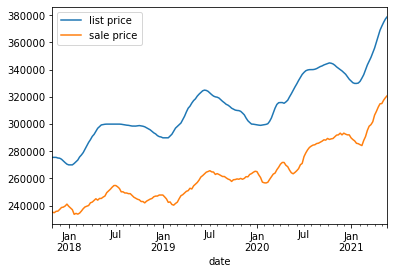

In [40]:
# examining the relation between list and sale
us_df.plot(x= "date")

In [ ]:
# node count: ???
# activation method: swish
# gist per austin: 100~200, nodes: play with, hidden layers: 1~2 max 3